In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
%matplotlib inline
from numpy.fft import fft,fft2, fftshift, fftfreq, ifft, ifftshift,ifft2
pi = np.pi
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Discrete time signal vs Digital signal vs Analog signal
- **Analog signal** -> $x(t)$, $t$ is continious, $x(t)$ is continious
- **Discrete time signal** -> $x[n]$, $n$ is discrete, $x[n]$ is continious
- **Digital signal** -> $x[n]$, $n$ is discrete, $x[n]$ is discrete

For discrete signal, <span style="color:red">$n = 0,~1,~2,~\cdots,~(N-1)$</span> where $N = \mathrm{length}(x)$

# Example of periodic discrete time signal - sinusoids (sin, cos)

For discrete time period signals, digital frequency is defined as
$$f_{\mathrm{digital}} = \frac{F}{F_s}$$

where $F$ is the original frequency in $\mathrm{Hz}$ and $F_s$ is the sampling frequency in $\mathrm{Hz}$.

Unit of $f_{\mathrm{digital}}$ is $\mathrm{cycles/sample}$

x(t) = cos(2pi*f*t)

In [3]:
np.arange(5)

array([0, 1, 2, 3, 4])

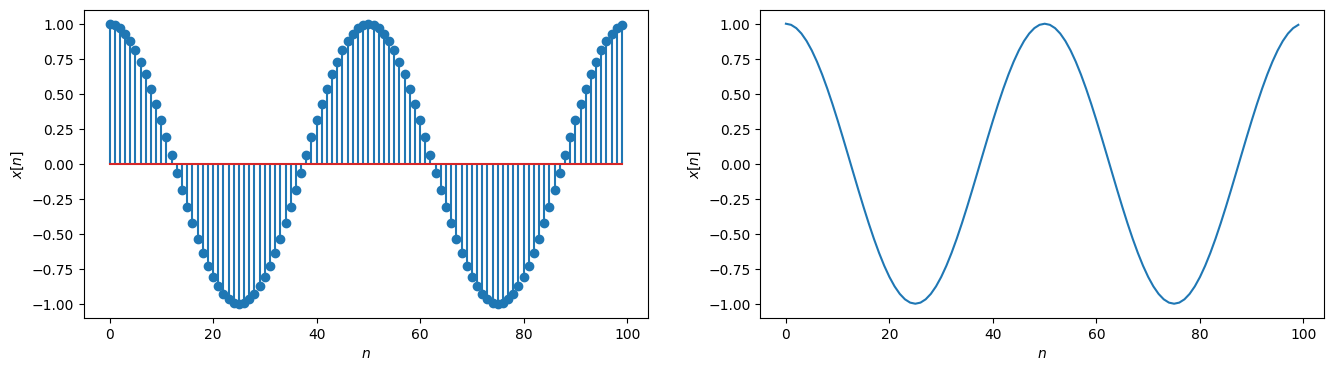

In [4]:
F = 100 # Hz
Fs = 5000 # Sampling Frequency, Hz
f = F/Fs # diqital frequency, cycles/sample.
# f must be -0.5 <= f < 0.5

N = 100
n = np.arange(N)
x = np.cos(2*pi*f*n)

fig = plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.stem(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
#If we use plt.plot, it will interpolate the samples and give a continuous wave
plt.subplot(1,2,2)
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.show()

What will happen if f doesn't fall in the range -0.5 <= f < 0.5 ?

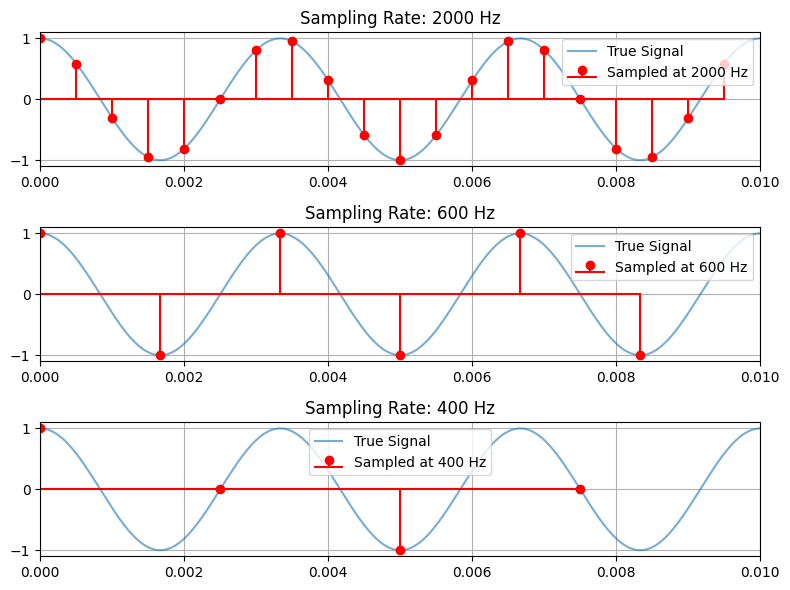

In [9]:
f_signal = 300
dur = 0.01          # Duration in seconds
t_cont = np.linspace(0, dur, 1000)
x_cont = np.cos(2 * np.pi * f_signal * t_cont) # continuous signal

# Sampling rates
Fs_list = [2000, 600, 400]

fig, axs = plt.subplots(len(Fs_list), 1, figsize=(8, 6))
for i, Fs in enumerate(Fs_list):
    t_samp = np.arange(0, dur, 1/Fs)
    x_samp = np.cos(2 * np.pi * f_signal * t_samp)

    axs[i].plot(t_cont, x_cont, label='True Signal', alpha=0.6)
    axs[i].stem(t_samp, x_samp, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Sampled at {Fs} Hz')
    # axs[i].plot(t_samp, x_samp, 'r-', label=f'Sampled at {Fs} Hz') # Comment out the previous line and uncomment this line to see the effect of interpolation
    axs[i].set_title(f'Sampling Rate: {Fs} Hz')
    axs[i].set_xlim([0, dur])
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

# Another interpretation of $f$

0.03
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(100,)


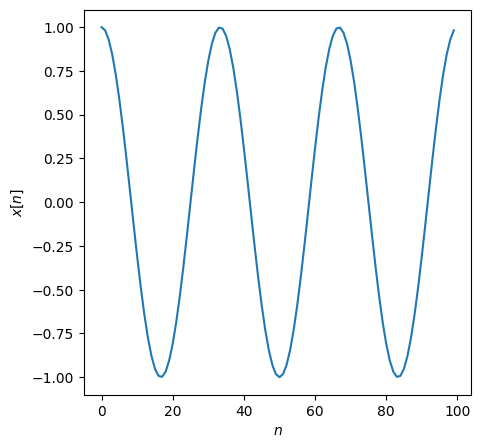

In [5]:
n_cycles = 3 # number of complete cycles we want
N = 100 # total number of samples we have

f = n_cycles/N # cycles/sample
print(f)

n = np.arange(N)
print(n) #
print(n.shape) # number of samples
x = np.cos(2*pi*(1+f)*n)

fig = plt.figure(figsize=(5, 5))
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.show()

### Interactive

In [6]:
@interact
def plot_cosine(n_cycles=(-4, 8, 1)):
    N = 100

    f = n_cycles/N # cycles/sample


    n = np.arange(N)

    x = np.sin(2*pi*(1+f)*n)

    fig = plt.figure(figsize=(5, 5))
    plt.plot(n, x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.show()


interactive(children=(IntSlider(value=2, description='n_cycles', max=8, min=-4), Output()), _dom_classes=('wid…

# What happens when we change the frequency?

In [7]:
@interact
def plot_sin_change_freq(f_add=(0, 2, 0.01)):
    n_cycles = 3
    N = 100

    f = n_cycles/N
    x = np.arange(N)
    y = np.cos(2*np.pi*(f_add + f)*x)

    plt.stem(x, y)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.title(f"cosine with frequency = {f_add+f:.2f} cycle/samples")
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='f_add', max=2.0, step=0.01), Output()), _dom_classes…

# Discrete Fourier Transform

### Theory
Any signal of length $N$ can be represented as a sum of sinusoids with frequencies $f_0$, $2f_0$, $\cdots$, $(N-1)f_0$, where $f_0 = \frac{1}{N}$.

So from $x[n] = [x_0,~x_1,~\cdots~x_{N-1}]$ we get $X[k] = [X_0,~X_1,~\cdots~X_{N-1}]$, where $X_k$ represents the "magnitude" (i.e. strength) and "phase" (i.e. angle or time delay) of sinusoid with frequence $f_k = kf_0 = \frac{k}{N}$

The Discrete Fourier Transform (DFT) is defined as:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j\frac{2\pi}{N}kn}
$$

where:
- \( X[k] \) is the DFT of the signal \( x[n] \)
- \( N \) is the total number of samples
- \( k = 0, 1, ... , N-1 \)
- \$$ ( j = \sqrt{-1} ) (imaginary \ unit) $$


### Demonstration

In [8]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)
    return X


In [9]:
def dft_frequencies(N):
    delta_f = 1 / N

    # Frequencies: 0 to fs (with negative frequencies in second half)
    freqs = np.array([k * delta_f for k in range(N)])

    # Shift second half to represent negative frequencies
    for k in range(N):
        if k >= N // 2:
            freqs[k] -= 1
    return freqs


In [10]:
n_cycles = 5
N = 20

f = n_cycles/N
n = np.arange(N)
x = np.cos(2*np.pi*f*n)
# Manual DFT
X_manual = dft(x)
freqs = dft_frequencies(N)
print("Manual DFT:", np.round(X_manual, 2))
print(freqs)

Manual DFT: [-0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.+0.j 10.-0.j -0.-0.j  0.-0.j  0.-0.j
  0.-0.j  0.-0.j -0.+0.j  0.-0.j  0.+0.j  0.-0.j 10.+0.j -0.-0.j -0.+0.j
 -0.-0.j -0.-0.j]
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05]


In [11]:
# NumPy's FFT (same math, faster)
X_fft = fft(x)
fk=fftfreq(N)
print(fk)
print("FFT:", np.round(X_fft, 2))

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05]
FFT: [-0.+0.j -0.-0.j -0.+0.j -0.-0.j -0.+0.j 10.-0.j  0.+0.j  0.-0.j  0.-0.j
  0.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j 10.+0.j -0.-0.j  0.+0.j
 -0.+0.j -0.+0.j]


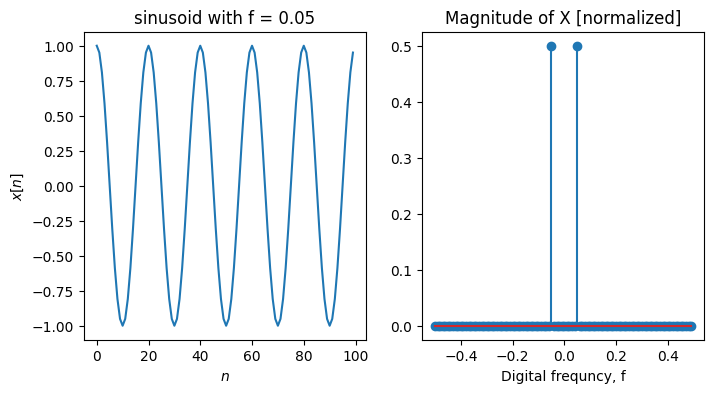

In [12]:
%matplotlib inline
n_cycles = 5
N = 100

f = n_cycles/N
n = np.arange(100)
x = np.cos(2*np.pi*f*n)

# Fast Fourier Transform
X_fft = fft(x)
#print(X_fft)

X_fft = fftshift(X_fft) # to shift the freuqncies from [0, 1] range to [-0.5, 0.5] range
X_fft = X_fft/N # Normalization

fk = fftfreq(N)
fk = fftshift(fk)


fig = plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title(f"sinusoid with f = {f}")

plt.subplot(1, 2, 2)
plt.stem(fk, np.abs(X_fft))
plt.xlabel("Digital frequncy, f")
plt.title("Magnitude of X [normalized]")



plt.show()


In [13]:
X_fft = fft(x)
print(X_fft[:6])
print("Abs:", np.abs(X_fft[:6]))

[-3.94299247e-15+0.00000000e+00j -4.88498131e-15+1.43988846e-15j
 -4.83257044e-15+5.78511016e-17j -7.66053887e-15-1.21784386e-15j
 -1.10329384e-14-6.69954528e-17j  5.00000000e+01-3.23445766e-14j]
Abs: [3.94299247e-15 5.09277146e-15 4.83291669e-15 7.75673897e-15
 1.10331418e-14 5.00000000e+01]


In [14]:
print("Ang:", np.angle(X_fft[:6])*pi/180)

Ang: [ 5.48311356e-02  4.98283077e-02  5.46222107e-02 -5.20795032e-02
 -5.47251550e-02 -1.12903871e-17]


In [15]:
fk = fftfreq(N)
fk

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01])

# Helper Functions

In [16]:
def perform_fft(x, N):
    X = fft(x)
    X = fftshift(X)
    X = X/N # Normalization

    fk = fftfreq(N)
    fk = fftshift(fk)

    return X, fk

def plot_sig_and_fft(x, n, X, fk, f):
    fig = plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.stem(n, x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.title(f"sinusoid with f = {f}")

    plt.subplot(1, 2, 2)
    plt.stem(fk, np.abs(X))
    plt.xlabel("Digital frequncy, f")
    plt.title("Magnitude of X [normalized]")

# Sum of Sinusoids

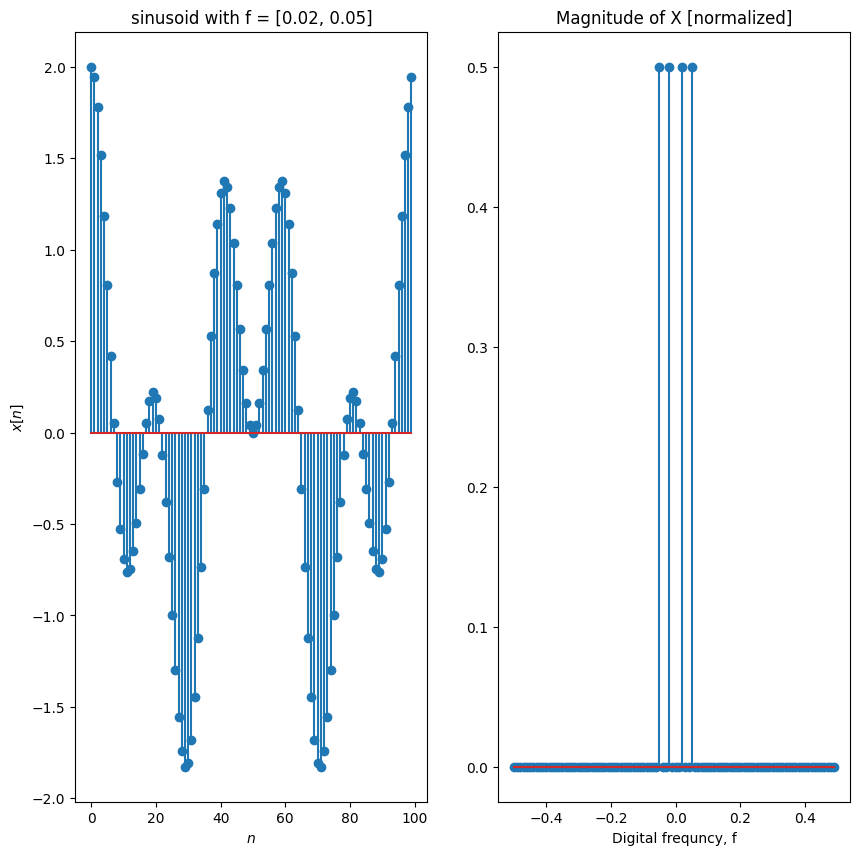

In [17]:
n_cycles_1 = 2
n_cycles_2 = 5
N = 100

f1 = n_cycles_1/N
f2 = n_cycles_2/N
n = np.arange(N)
x = np.cos(2*np.pi*f1*n) + np.cos(2*np.pi*f2*n)

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [f1, f2])

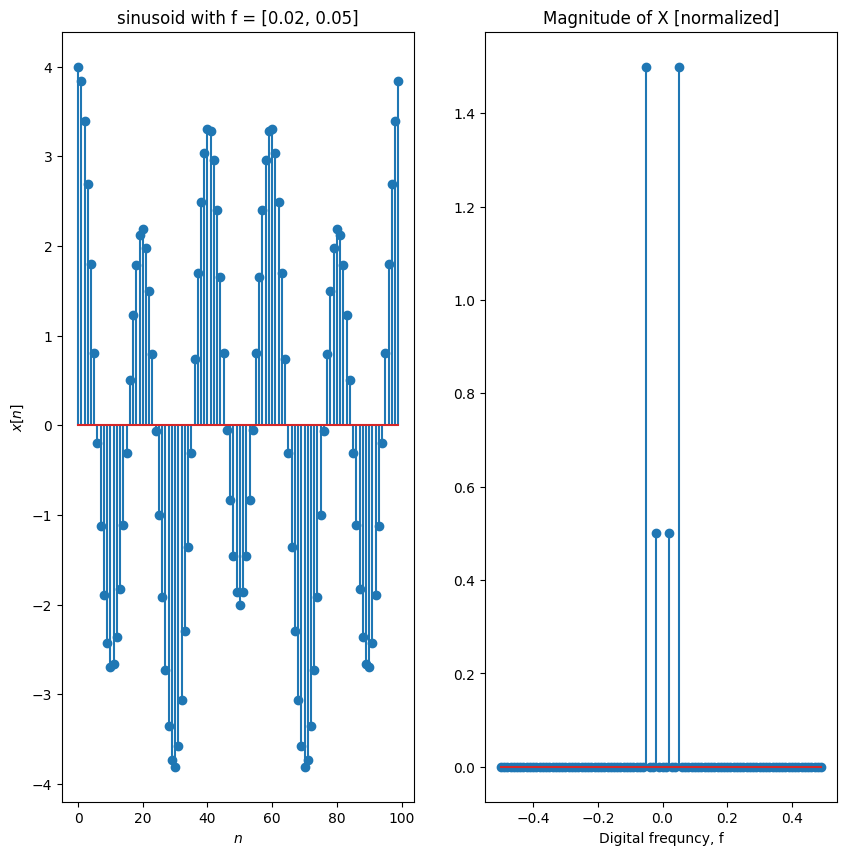

In [18]:
n_cycles_1 = 2
n_cycles_2 = 5
N = 100

f1 = n_cycles_1/N
f2 = n_cycles_2/N
n = np.arange(N)
x = np.cos(2*np.pi*f1*n) + 3*np.cos(2*np.pi*f2*n)

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [f1, f2])

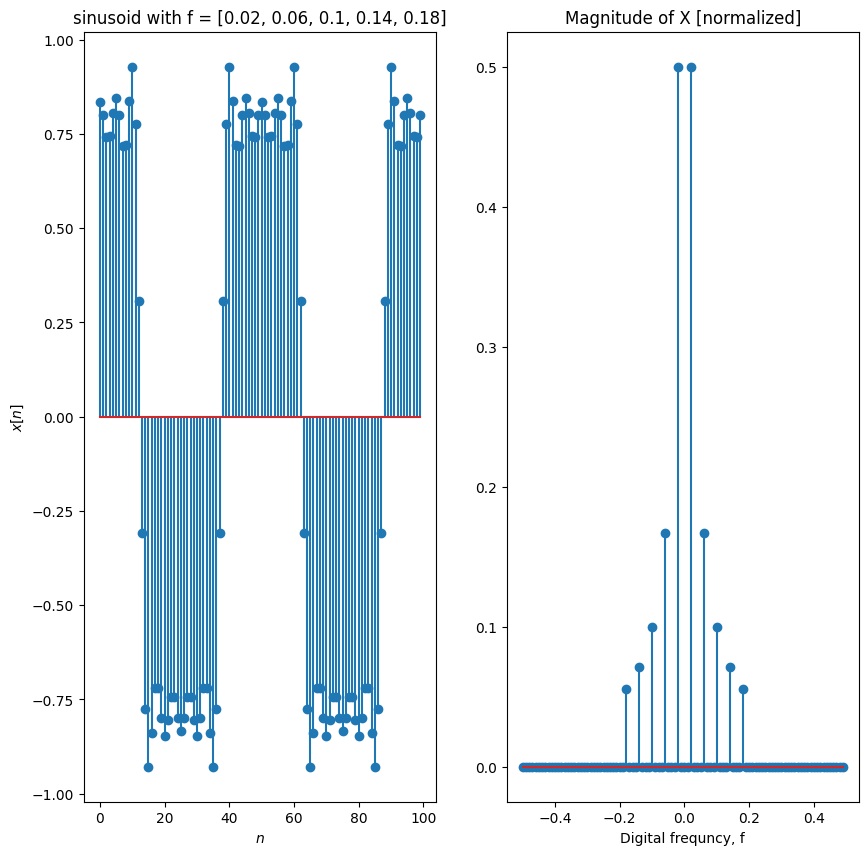

In [19]:
n_cycles_0 = 2
N = 100

f0 = n_cycles_0/N

n = np.arange(N)
x = np.cos(2*pi*f0*n) \
     - (1/3)*np.cos(2*pi*(3*f0)*n)  \
     + (1/5)*np.cos(2*pi*(5*f0)*n)  \
     - (1/7)*np.cos(2*pi*(7*f0)*n) \
     + (1/9)*np.cos(2*pi*(9*f0)*n) \
    #  - (1/11)*np.cos(2*pi*(11*f0)*n)



X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [f0,3*f0,5*f0,7*f0,9*f0])

# Reconstruction using IFFT

In [20]:
def perform_ifft(X, N):
    X_ishift = ifftshift(X)
    x_recon = ifft(X_ishift)
    x_recon = np.real(x_recon)*N

    n = np.arange(N)
    if x_recon.shape[0] > N:
        x_recon = x_recon[:N]

    return x_recon, n

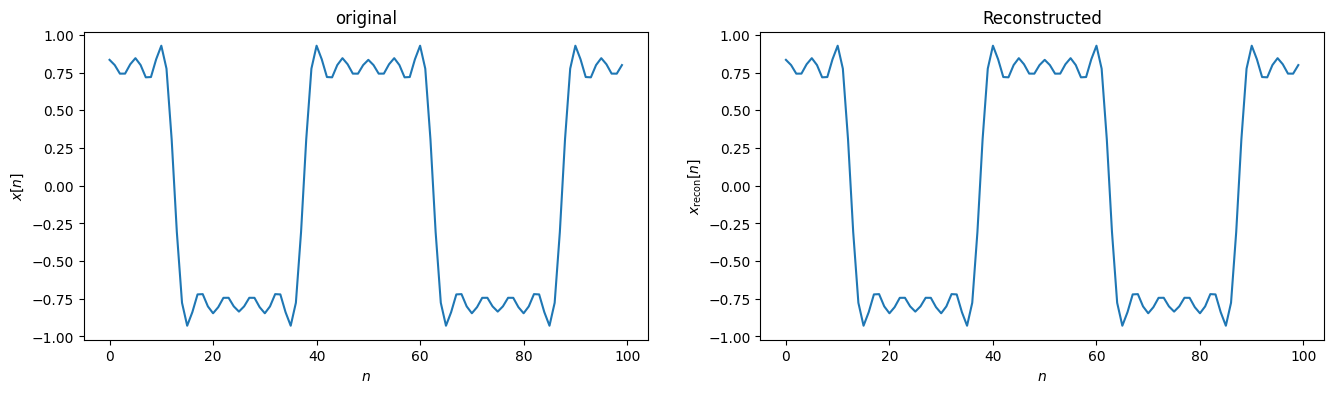

In [21]:
x_reconm, n_recon = perform_ifft(X, N)


fig = plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title(f"original")

plt.subplot(1, 2, 2)
plt.plot(n_recon, x_reconm)
plt.xlabel("$n$")
plt.ylabel("$x_{\mathrm{recon}}[n]$")
plt.title("Reconstructed")
plt.show()

# Common DFT Pair

### Pulse

$$DFT\left(\delta[n]\right) = 1$$

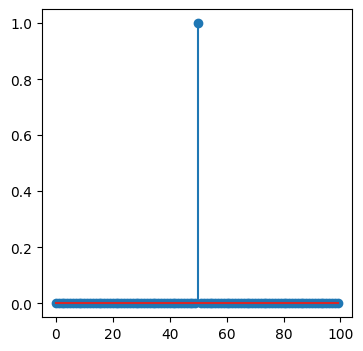

In [22]:
%matplotlib inline
N = 100
n = np.arange(N)

x = np.zeros_like(n)
x[N//2] = 1

fig = plt.figure(figsize=(4, 4))
plt.stem(n, x)
plt.show()

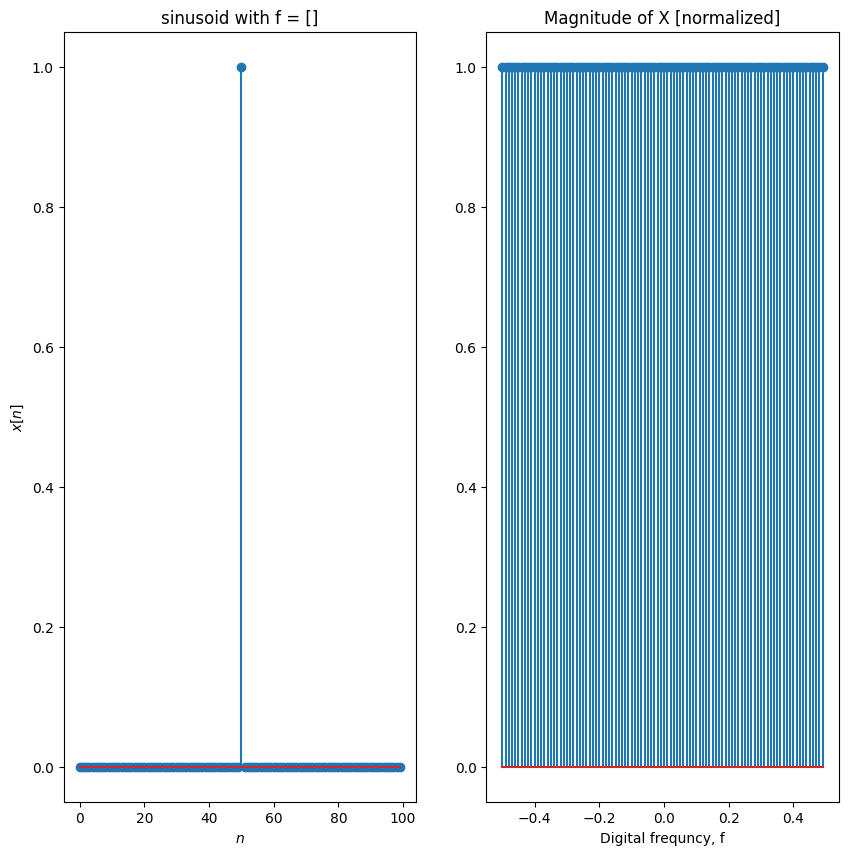

In [23]:
%matplotlib inline

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X*N, fk, [])

### Rectangle

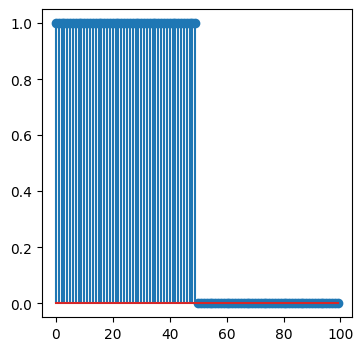

In [24]:
%matplotlib inline
N = 100
n = np.arange(N)

x = np.zeros_like(n)
x[n < N//2] = 1

fig = plt.figure(figsize=(4, 4))
plt.stem(n, x)
plt.show()

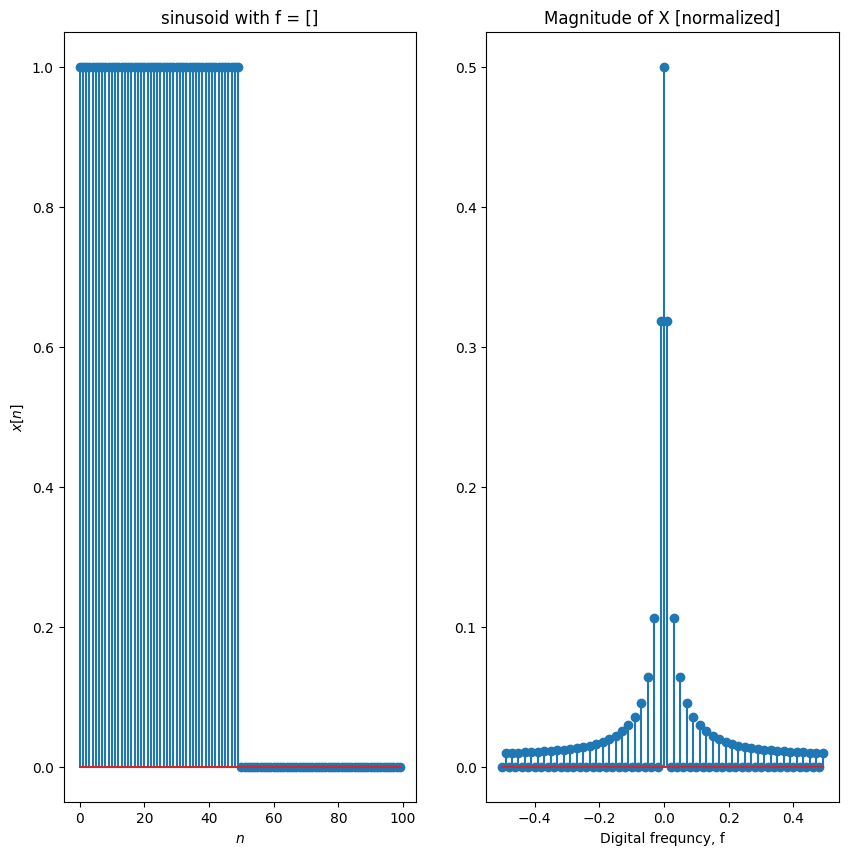

In [25]:
%matplotlib inline
X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [])

# Changing resolution - zero padding

So far we have used $N = 100$, which means the smallest frequency is $1/N = 1/100 = 0.01$

This means the FFT can differentiate between frequencies with a minimum difference of 0.01 cycles/sample

What if the frequency is in between, say 0.035?

In [26]:
N = 100
res = 1/N
print(res)

0.01


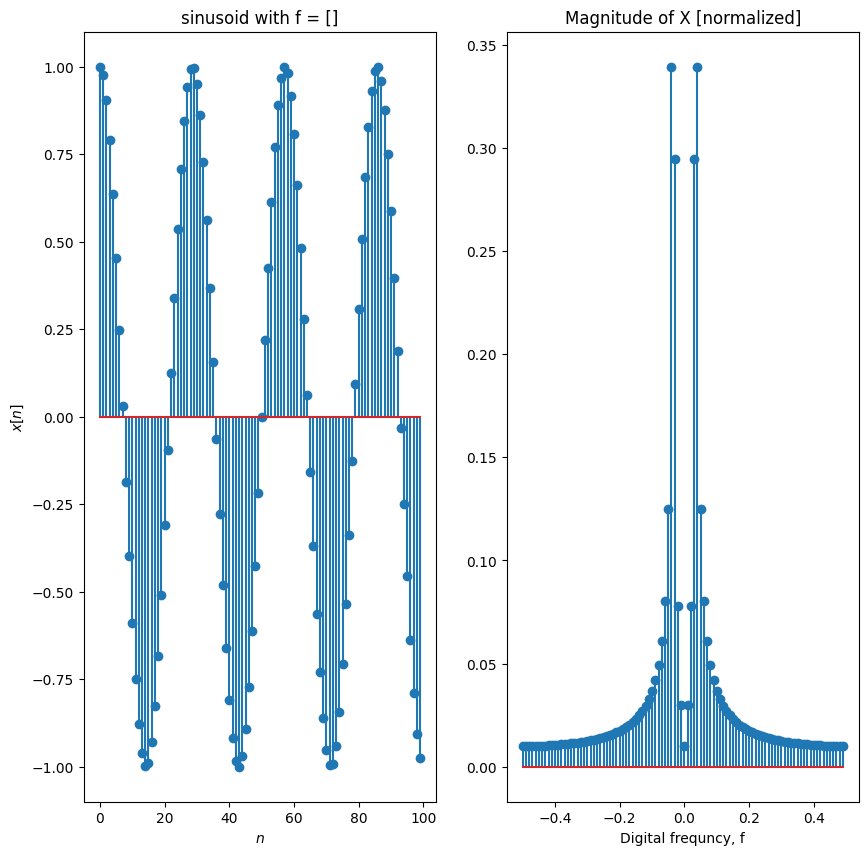

In [27]:
f = 0.035
n = np.arange(N)
x = np.cos(2*np.pi*f*n)

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [])

So the frequncy "leaks" because resolution is not high enough

How to increase resolution? By artificially changing $N$, i.e., Zero padding

For example, if we add additional 100 zeros, the signal would remain same but with additional zeros, and the new minimum frequency would be $1/N_{eq} = 1/200 = 0.005$

(100,)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


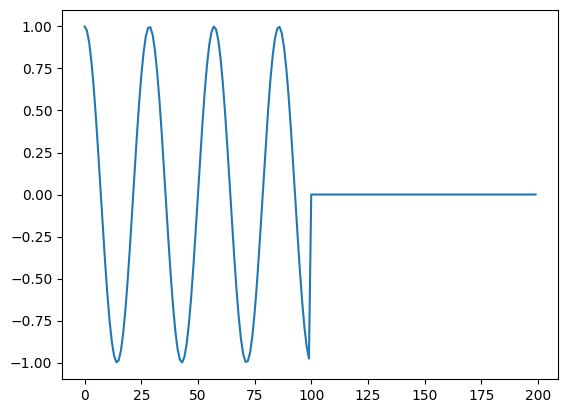

In [28]:
%matplotlib inline
N_zeros = 100
x_zero_padded = np.concatenate([x, np.zeros(N_zeros)])
n_zero_padded = np.concatenate([n, np.arange(N, N+N_zeros)])
#x_zero_padded = np.cos(2*pi*f*n_zero_padded)
print(x.shape)
print(n_zero_padded)
plt.plot(n_zero_padded, x_zero_padded)

In [29]:
%matplotlib inline

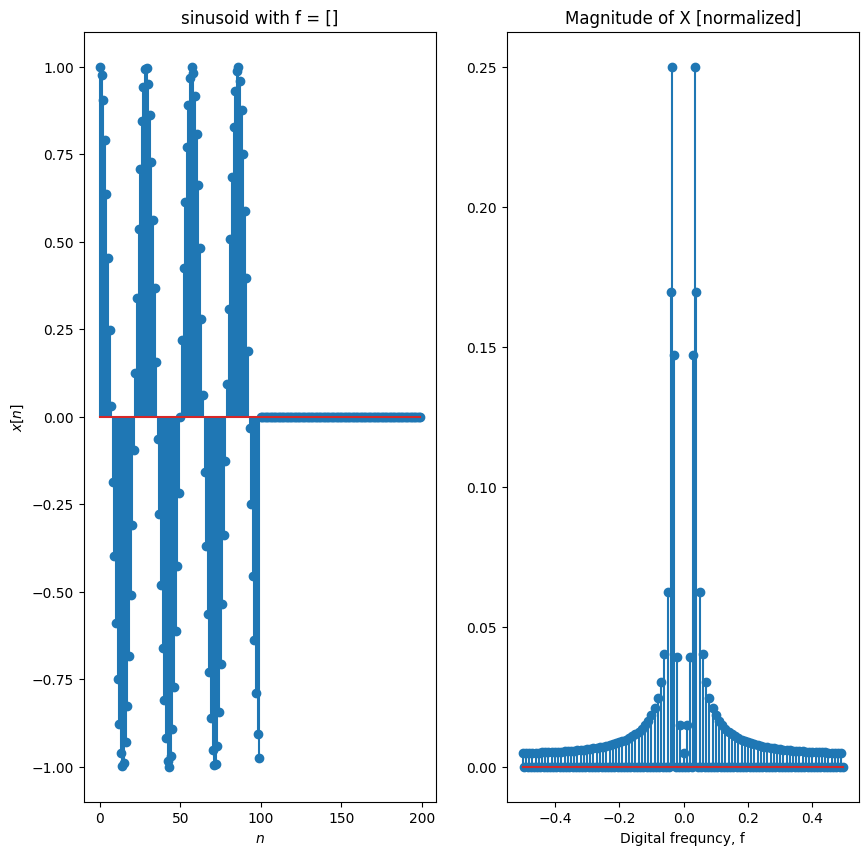

In [30]:
X, fk = perform_fft(x_zero_padded, N + N_zeros)
plot_sig_and_fft(x_zero_padded, n_zero_padded, X, fk, [])

In [31]:
N_zeros = 100

In [32]:
fk

array([-0.5  , -0.495, -0.49 , -0.485, -0.48 , -0.475, -0.47 , -0.465,
       -0.46 , -0.455, -0.45 , -0.445, -0.44 , -0.435, -0.43 , -0.425,
       -0.42 , -0.415, -0.41 , -0.405, -0.4  , -0.395, -0.39 , -0.385,
       -0.38 , -0.375, -0.37 , -0.365, -0.36 , -0.355, -0.35 , -0.345,
       -0.34 , -0.335, -0.33 , -0.325, -0.32 , -0.315, -0.31 , -0.305,
       -0.3  , -0.295, -0.29 , -0.285, -0.28 , -0.275, -0.27 , -0.265,
       -0.26 , -0.255, -0.25 , -0.245, -0.24 , -0.235, -0.23 , -0.225,
       -0.22 , -0.215, -0.21 , -0.205, -0.2  , -0.195, -0.19 , -0.185,
       -0.18 , -0.175, -0.17 , -0.165, -0.16 , -0.155, -0.15 , -0.145,
       -0.14 , -0.135, -0.13 , -0.125, -0.12 , -0.115, -0.11 , -0.105,
       -0.1  , -0.095, -0.09 , -0.085, -0.08 , -0.075, -0.07 , -0.065,
       -0.06 , -0.055, -0.05 , -0.045, -0.04 , -0.035, -0.03 , -0.025,
       -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,
        0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,  0.045,  0.05 ,  0.055,
      

# Example of 2D periodic discrete time signal - sinusoids (sin, cos)

In [33]:
n_cycle_1 = 3
n_cycle_2 = 0

N = 100
M = 100

f1 = n_cycle_1/N
f2 = n_cycle_2/M

n, m = np.meshgrid(np.arange(N), np.arange(M))

In [34]:
x = np.cos(2*pi*f1*n + 2*pi*f2*m)

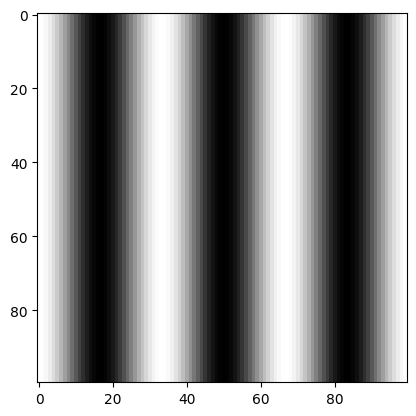

In [35]:
%matplotlib inline
plt.figure()
plt.imshow(x, cmap="gray")

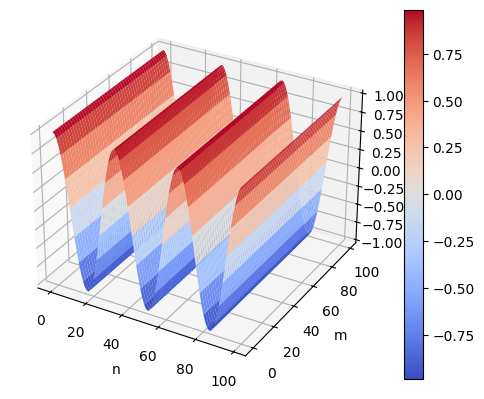

In [36]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(n, m, x, cmap=cm.coolwarm)
ax.set_xlabel("n")
ax.set_ylabel("m")
fig.colorbar(surf)
plt.show()

In [37]:
from numpy.fft import fft, fft2, fftshift, fftfreq
# Compute DFT
X = fft2(x)

# Center the magnitude response to (M/2, N/2) & nomrmalize
X_centered = fftshift(X)
X_centered = X_centered/(M*N)

# Frequencies
u = fftshift(fftfreq(N))
v = fftshift(fftfreq(M))

u, v = np.meshgrid(u, v)

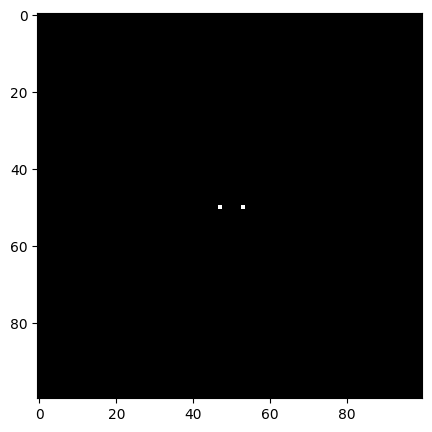

In [38]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.imshow(np.log(1+np.abs(X_centered)), cmap="gray")

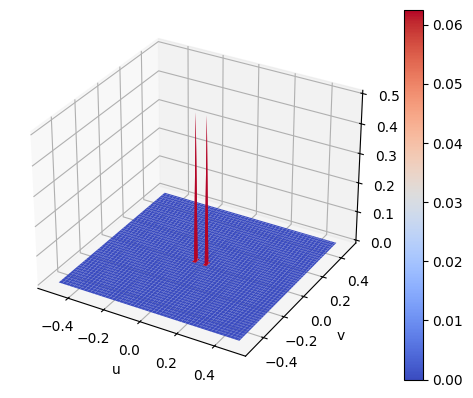

In [39]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(u, v, np.abs(X_centered), cmap=cm.coolwarm)
ax.set_xlabel("u")
ax.set_ylabel("v")
fig.colorbar(surf)
plt.show()

# Frequency along x and y

In [40]:
n_cycle_1 = 3
n_cycle_2 = 5

N = 100
M = 100

f1 = n_cycle_1/N
f2 = n_cycle_2/M

n, m = np.meshgrid(np.arange(N), np.arange(M))

x = np.cos(2*pi*f1*n + 2*pi*f2*m)

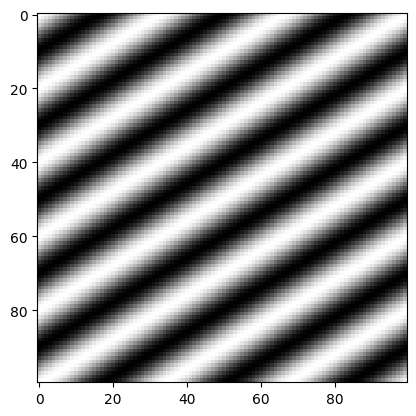

In [41]:
%matplotlib inline
plt.figure()
plt.imshow(x, cmap="gray")

In [42]:
def perform_fft2(x, M, N):
    X = fft2(x)
    X = fftshift(X)
    X= X/(N*M)


    u = fftshift(fftfreq(M))
    v = fftshift(fftfreq(N))

    u, v = np.meshgrid(u, v)

    return X, u, v

In [43]:
X, u, v = perform_fft2(x, M, N)

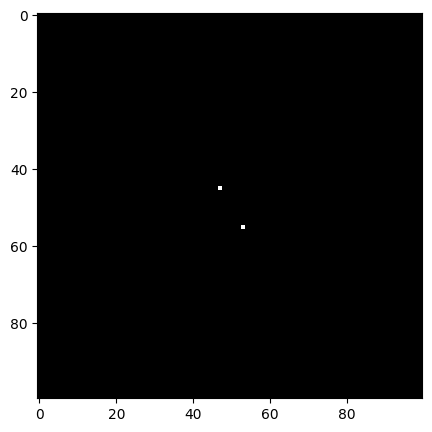

In [44]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.imshow(np.abs(X), cmap="gray")

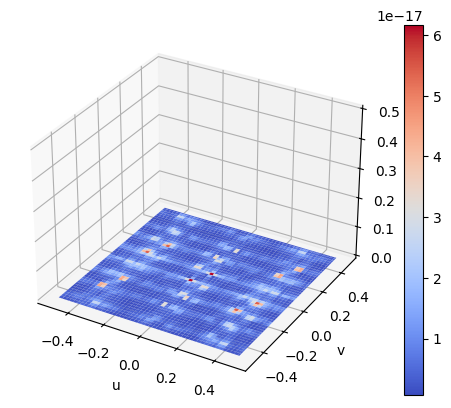

In [45]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(u, v, np.abs(X), cmap=cm.coolwarm)
ax.set_xlabel("u")
ax.set_ylabel("v")
fig.colorbar(surf)
plt.show()

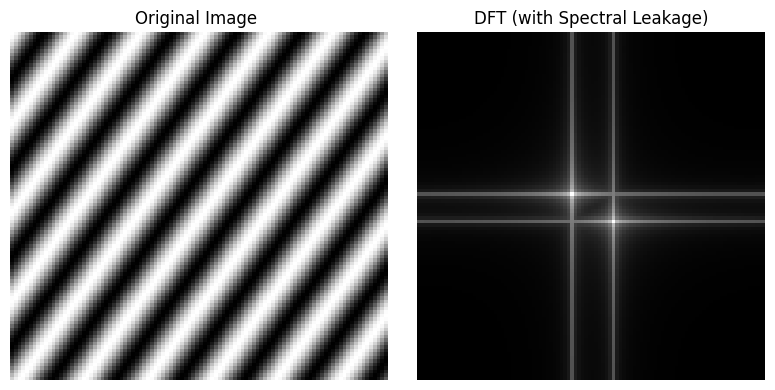

In [46]:
n_cycle_1 = 5.9
n_cycle_2 = 3.9

N = 100
M = 100

f1 = n_cycle_1 / N
f2 = n_cycle_2 / M

# Create 2D coordinate grid
n, m = np.meshgrid(np.arange(N), np.arange(M))

x = np.cos(2 * pi * f1 * n + 2 * pi * f2 * m)


# Display original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x, cmap='gray', aspect='auto')
plt.title("Original Image ")
plt.axis('off')

X,u,v =perform_fft2(x,M,N)
X=X*M*N #Removing Normalization to show the spectral leakage effectively

# Display frequency domain
plt.subplot(1, 2, 2)
plt.imshow(np.log(1+np.abs(X)), cmap='gray')
plt.title("DFT (with Spectral Leakage)")
plt.axis('off')

plt.tight_layout()
plt.show()


**Hanning Window**

The Hanning window is defined as:

$$
w[n] =
\begin{cases}
0.5 \left(1 - \cos\left(\frac{2\pi n}{N - 1}\right)\right), & 0 \leq n \leq N - 1 \\
0, & \text{otherwise}
\end{cases}
$$

where \( N \) is the window length.


In [47]:
def hann2d(M, N):
    hann_row = np.hanning(M)
    hann_col = np.hanning(N)

    # Outer product to create separable 2D window
    window = np.outer(hann_row, hann_col)
    return window


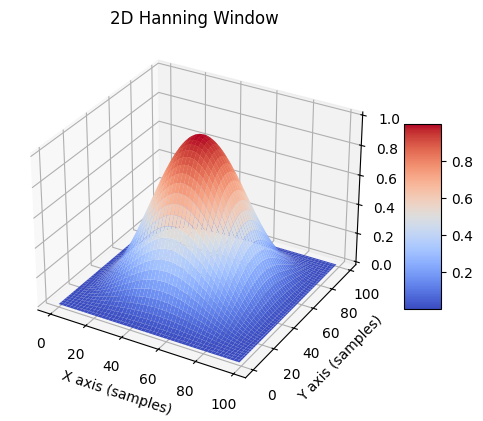

In [48]:
M, N = 100, 100
window = hann2d(M, N)
n=np.arange(N)
m=np.arange(M)
n, m = np.meshgrid(n, m)
# 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(n, m, window, cmap=cm.coolwarm)

# Customize plot
ax.set_xlabel("X axis (samples)")
ax.set_ylabel("Y axis (samples)")
ax.set_zlabel("Amplitude")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("2D Hanning Window")
plt.show()

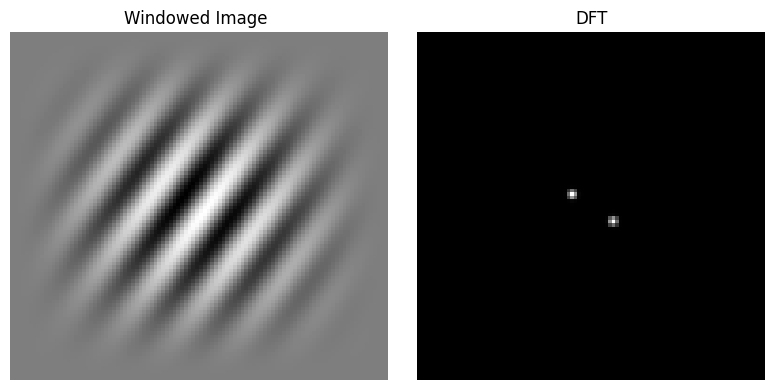

In [49]:
image_windowed = x * hann2d(M, N)
# Display windowed image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_windowed, cmap='gray', aspect='auto')
plt.title("Windowed Image ")
plt.axis('off')
# Now perform FFT on the windowed image
X,u,v= perform_fft2(image_windowed,N,M)
X=X*M*N #Removing Normalization

# Display frequency domain
plt.subplot(1, 2, 2)
plt.imshow(np.abs(X), cmap='gray')
plt.title("DFT")
plt.axis('off')

plt.tight_layout()
plt.show()

# Filtering

In signal processing, a digital filter is a system that performs mathematical operations on a sampled, discrete-time signal to reduce or enhance certain aspects of that signal, especially in the frequency domain

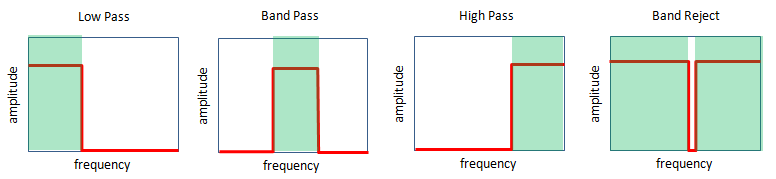

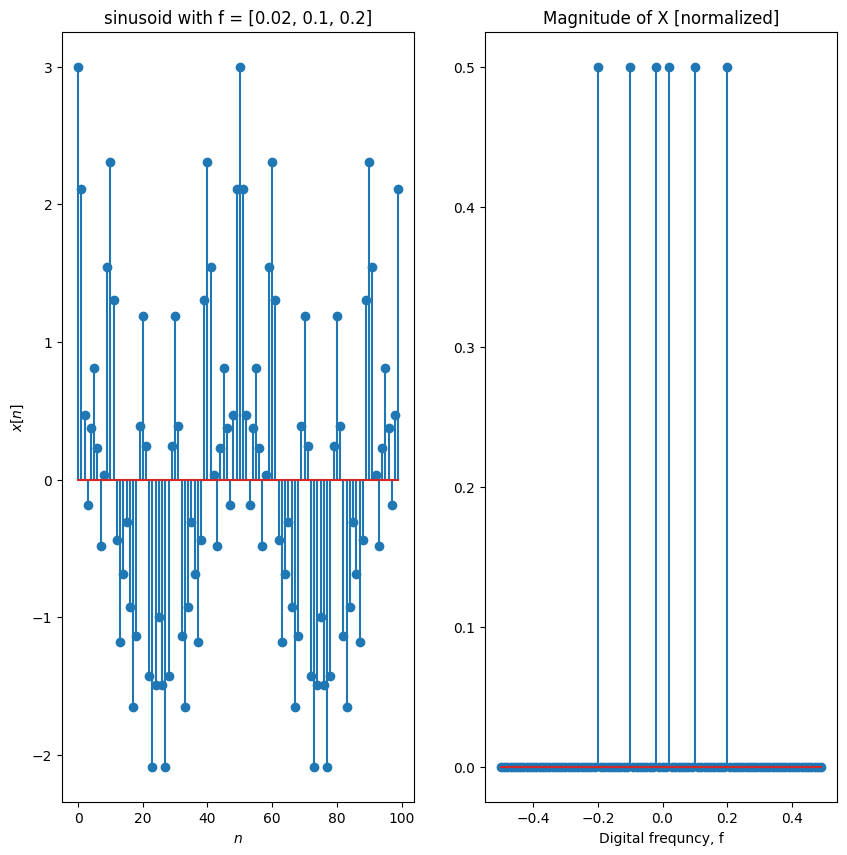

In [50]:
n_cycles_1 = 2
n_cycles_2 = 10
n_cycles_3 = 20
N = 100

f1 = n_cycles_1/N
f2 = n_cycles_2/N
f3 = n_cycles_3/N
n = np.arange(N)
x = np.cos(2*np.pi*f1*n) + np.cos(2*np.pi*f2*n) + np.cos(2*np.pi*f3*n)

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [f1, f2, f3])

### Low pass

#### Ideal

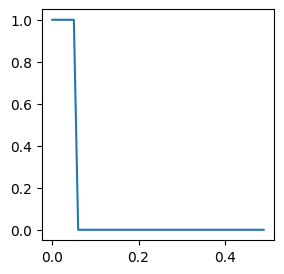

In [51]:
f_thres = 0.05

H_lp_ideal = np.zeros_like(fk)
H_lp_ideal[np.abs(fk) <= f_thres] = 1

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_lp_ideal[fk>=0])

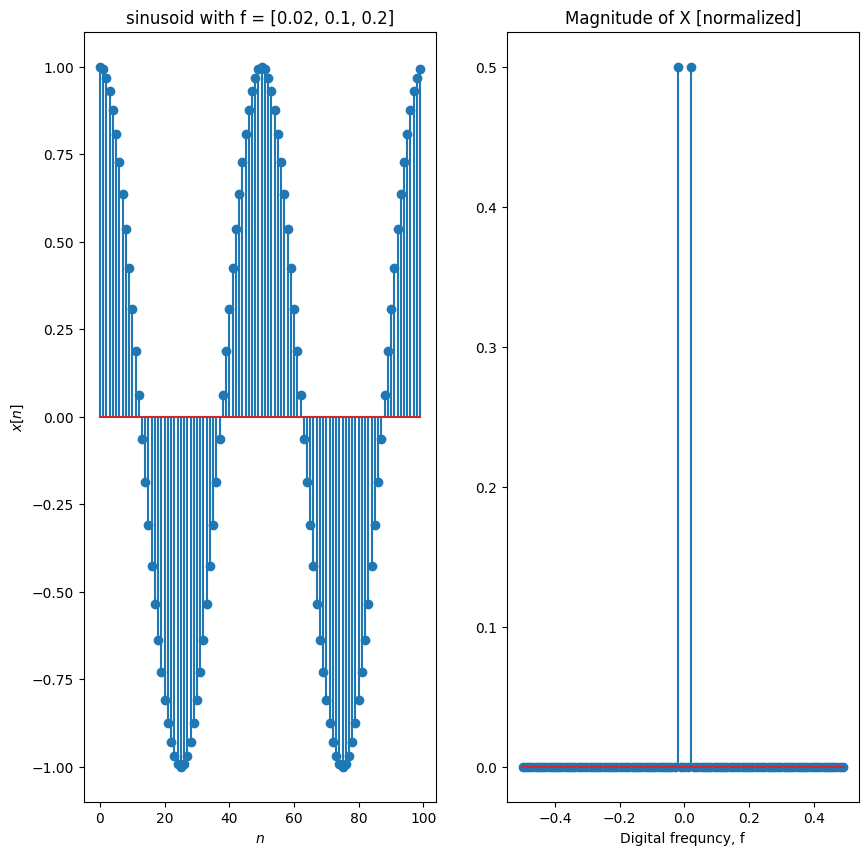

In [52]:
X_filtered_1 = X*H_lp_ideal
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

#### Butterworth filter

###  Butterworth Low-Pass Filter Equation

A Butterworth filter of order \( n \) with cutoff frequency \( f_c \) has a magnitude response given by:

$$
H(f) = \frac{1}{\sqrt{1 + \left( \frac{f}{f_c} \right)^{2n}}}
$$

- \( H(f) \): Filter gain at frequency \( f \)  
- \( f_c \): Cutoff frequency  
- \( n \): Filter order — higher \( n \) means sharper roll-off


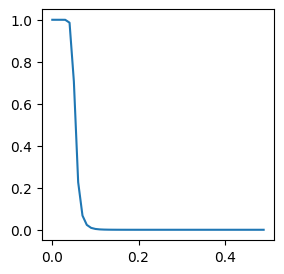

In [53]:
f_thres = 0.05

N_ord = 8
H_lp_butter = 1/np.sqrt(1 + (fk/f_thres)**(2*N_ord))

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_lp_butter[fk>=0])

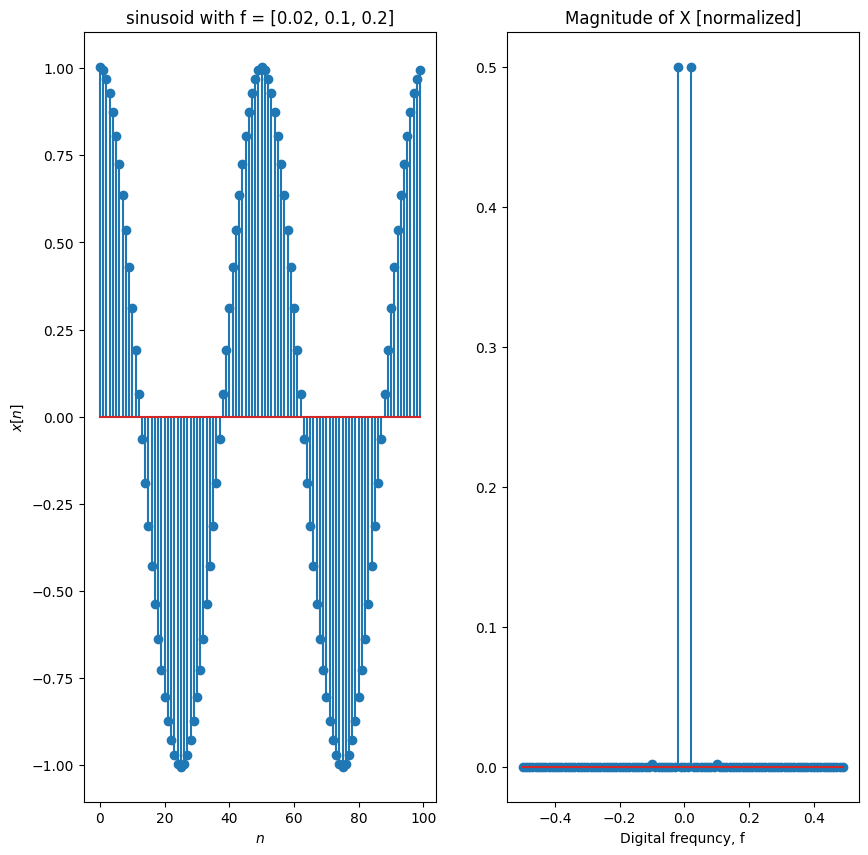

In [54]:
X_filtered_1 = X*H_lp_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

### High pass

#### Ideal

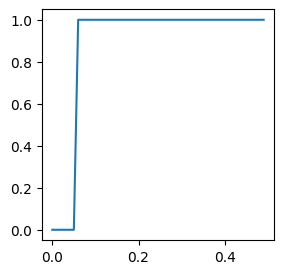

In [55]:
f_thres = 0.05

H_lp_ideal = np.zeros_like(fk)
H_lp_ideal[np.abs(fk) <= f_thres] = 1

H_hp_ideal = 1 - H_lp_ideal

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_hp_ideal[fk>=0])

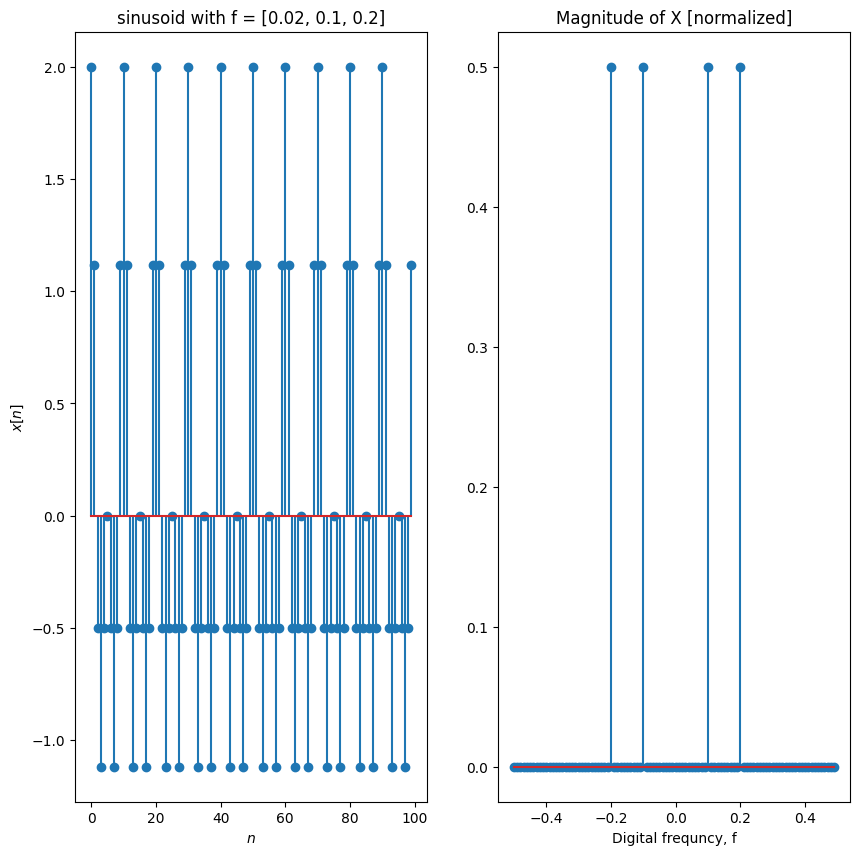

In [56]:
X_filtered_1 = X*H_hp_ideal
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

#### Butterworth

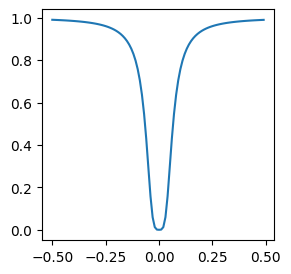

In [57]:
f_thres = 0.05

N_ord = 2
H_lp_butter = 1/np.sqrt(1 + (fk/f_thres)**(2*N_ord))
H_hp_butter = 1 - H_lp_butter

fig = plt.figure(figsize=(3, 3))
plt.plot(fk, H_hp_butter)

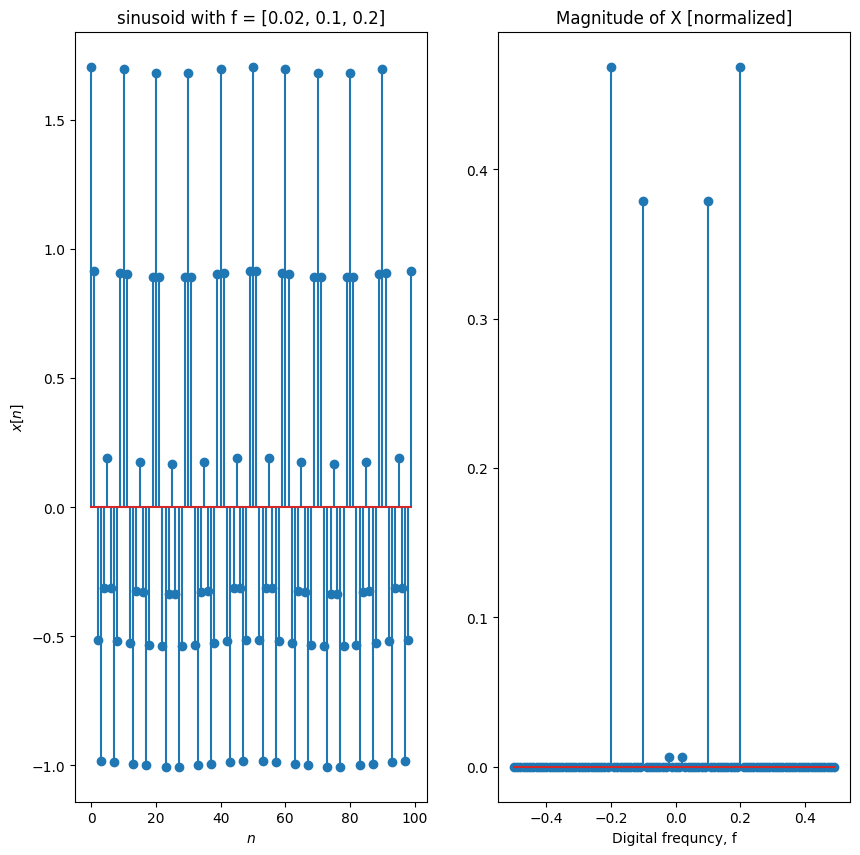

In [58]:
X_filtered_1 = X*H_hp_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

### Bandpass

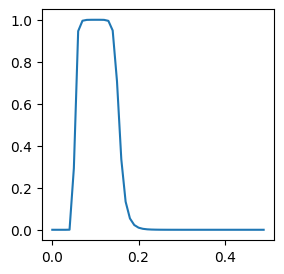

In [59]:
f_thres_high = 0.15
f_thres_low = 0.05

N_ord = 16
H_lp_1 = 1/np.sqrt(1 + (fk/f_thres_high)**(2*N_ord))
H_lp_2 = 1/np.sqrt(1 + (fk/f_thres_low)**(2*N_ord))
H_bp_butter = H_lp_1 - H_lp_2

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_bp_butter[fk>=0])

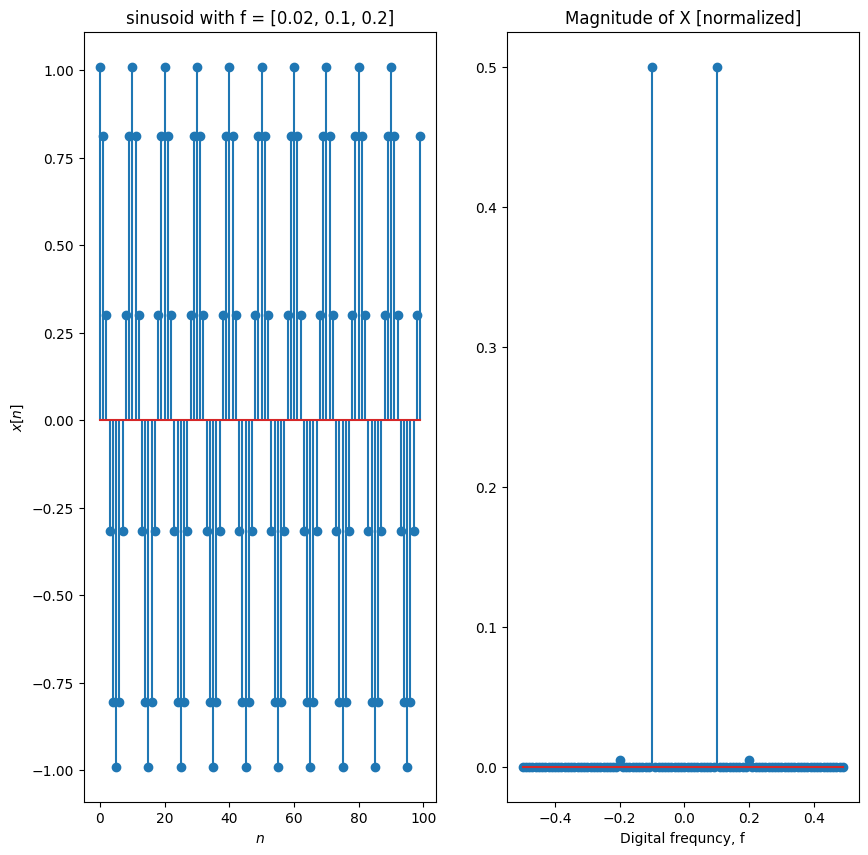

In [60]:
X_filtered_1 = X*H_bp_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

### Bandstop

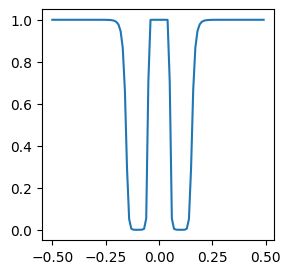

In [61]:
f_thres_high = 0.15
f_thres_low = 0.05

N_ord = 16
H_lp_1 = 1/np.sqrt(1 + (fk/f_thres_high)**(2*N_ord))
H_lp_2 = 1/np.sqrt(1 + (fk/f_thres_low)**(2*N_ord))
H_bp_butter = H_lp_1 - H_lp_2
H_br_butter = 1 - H_bp_butter

fig = plt.figure(figsize=(3, 3))
plt.plot(fk, H_br_butter)

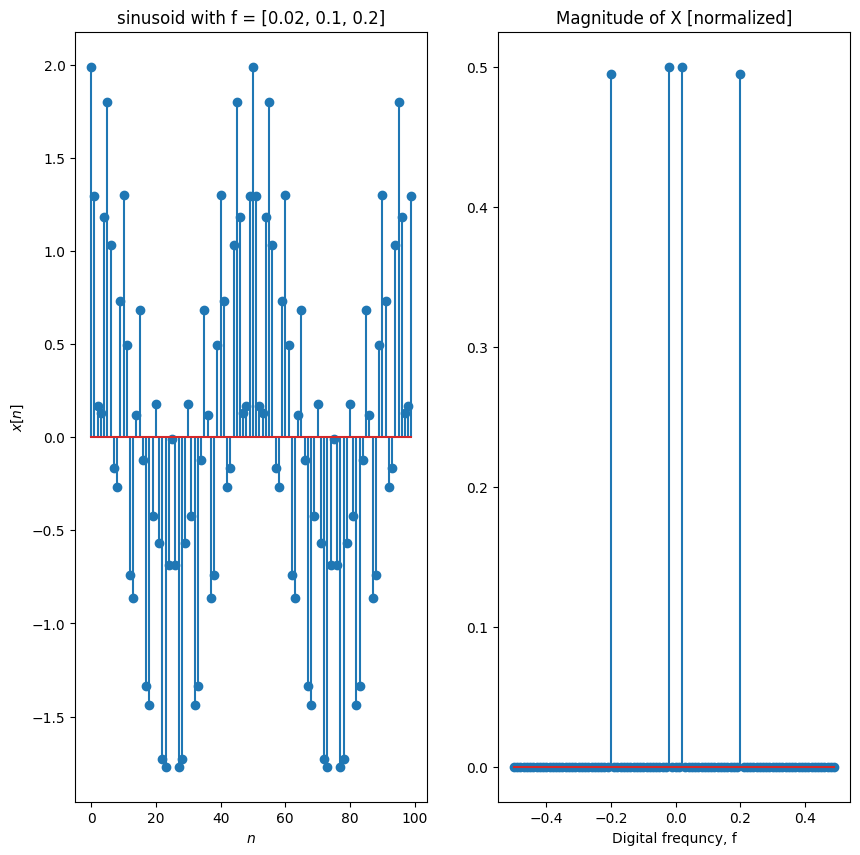

In [62]:
X_filtered_1 = X*H_br_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

# Filtering Image

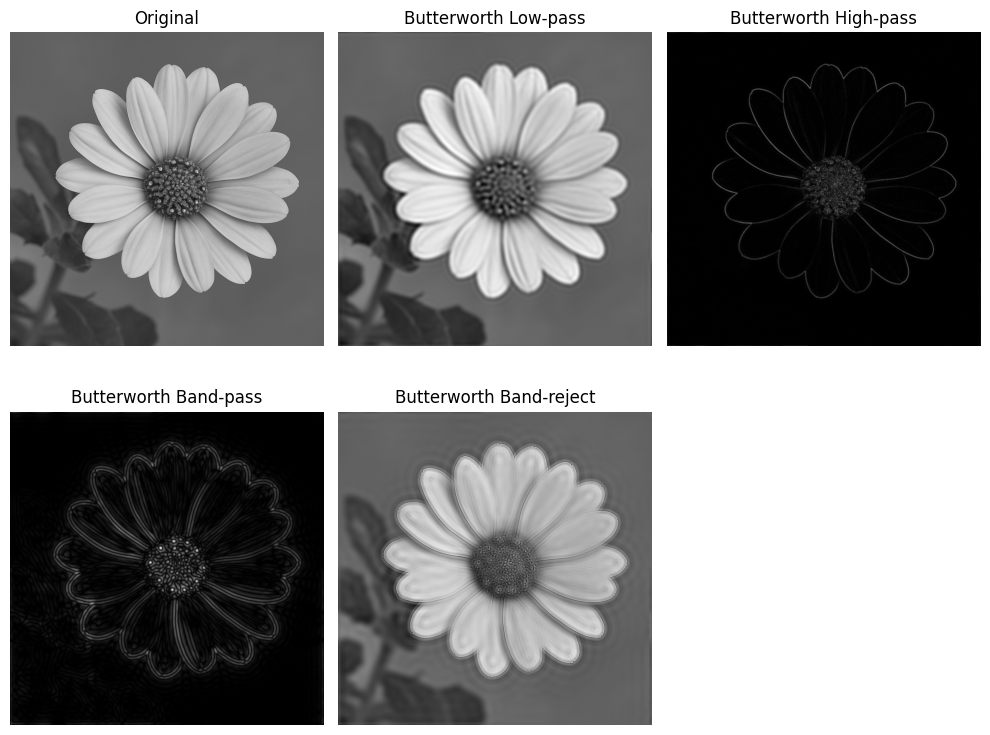

In [70]:
import cv2
from skimage import io
# Loading grayscale image
img = io.imread("/content/pretty_little_flower.png", as_gray=True)

rows, cols = img.shape
X,u,v= perform_fft2(img,rows,cols)

# Radial frequency grid
D = np.sqrt(u**2 + v**2)

# === LOW PASS FILTER ===
f_thres = 0.05
N_ord = 8
H_lp = 1 / np.sqrt(1 + (D / f_thres)**(2 * N_ord))

# === HIGH PASS FILTER ===
f_thres = 0.07
N_ord = 2
H_hp = 1 - (1 / np.sqrt(1 + (D / f_thres)**(2 * N_ord)))

# === BAND PASS FILTER ===
f_thres_low = 0.03
f_thres_high = 0.08
N_ord = 20
H_lp1 = 1 / np.sqrt(1 + (D / f_thres_high)**(2 * N_ord))
H_lp2 = 1 / np.sqrt(1 + (D / f_thres_low)**(2 * N_ord))
H_bp = H_lp1 - H_lp2

# === BAND STOP FILTER ===
H_br = 1 - H_bp

# Apply filters
def apply_filter(H, X):
    filtered = X * H
    return np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

# Filtered results
img_lp = apply_filter(H_lp, X)
img_hp = apply_filter(H_hp, X)
img_bp = apply_filter(H_bp, X)
img_br = apply_filter(H_br, X)

# Plotting
plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_lp, cmap='gray')
plt.title("Butterworth Low-pass")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_hp, cmap='gray')
plt.title("Butterworth High-pass")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_bp, cmap='gray')
plt.title("Butterworth Band-pass")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_br, cmap='gray')
plt.title("Butterworth Band-reject")
plt.axis('off')

plt.tight_layout()
plt.show()
